In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys

%pylab inline
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
import cv2
from itertools import product


Populating the interactive namespace from numpy and matplotlib


In [2]:
def intersection_over_union(target, prediction):
    # https://www.jeremyjordan.me/evaluating-image-segmentation-models/
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)

    # return the intersection over union value
    return iou_score




In [3]:
# DAVIS query information
davis = ['16'] #, '17']
annot = ['annot1', 'annot2']

# image path
IMAGE_DIR = '../../../datasets/'
PRED_DIR = '../../data/'
frame = 0


 >> Annot:  annot1  >> Sequence:  bear  >> IOU:  0.8870790595506245
 >> Annot:  annot1  >> Sequence:  blackswan  >> IOU:  0.8327777202608966
 >> Annot:  annot1  >> Sequence:  bmx-bumps  >> IOU:  0.5303888499968179
 >> Annot:  annot1  >> Sequence:  bmx-trees  >> IOU:  0.5272321135273635
 >> Annot:  annot1  >> Sequence:  boat  >> IOU:  0.6637322933990939
 >> Annot:  annot1  >> Sequence:  breakdance  >> IOU:  0.747221996917836
 >> Annot:  annot1  >> Sequence:  breakdance-flare  >> IOU:  0.6954436450839329
 >> Annot:  annot1  >> Sequence:  bus  >> IOU:  0.9034503742469421
 >> Annot:  annot1  >> Sequence:  camel  >> IOU:  0.8091838511479814
 >> Annot:  annot1  >> Sequence:  car-roundabout  >> IOU:  0.9419115673644659
 >> Annot:  annot1  >> Sequence:  car-shadow  >> IOU:  0.934124804213107
 >> Annot:  annot1  >> Sequence:  car-turn  >> IOU:  0.9006410256410257
 >> Annot:  annot1  >> Sequence:  cows  >> IOU:  0.8205259434317282
 >> Annot:  annot1  >> Sequence:  dance-jump  >> IOU:  0.79557740

/imatge/alba.herrera/maskMattnet/MAttNet/venv2/local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


 >> Annot:  annot1  >> Sequence:  elephant  >> IOU:  0.8658442888850948
 >> Annot:  annot1  >> Sequence:  flamingo  >> IOU:  0.7031155535851034
 >> Annot:  annot1  >> Sequence:  goat  >> IOU:  0.8688400104739461
 >> Annot:  annot1  >> Sequence:  hike  >> IOU:  0.6907258799927047
 >> Annot:  annot1  >> Sequence:  hockey  >> IOU:  0.7598509815159765
 >> Annot:  annot1  >> Sequence:  horsejump-high  >> IOU:  0.6131413805832411
 >> Annot:  annot1  >> Sequence:  horsejump-low  >> IOU:  0.12514425851125216
 >> Annot:  annot1  >> Sequence:  kite-surf  >> IOU:  0.5313215102974829
 >> Annot:  annot1  >> Sequence:  kite-walk  >> IOU:  0.5522891375069428
 >> Annot:  annot1  >> Sequence:  libby  >> IOU:  0.746395844277126
 >> Annot:  annot1  >> Sequence:  lucia  >> IOU:  0.7882834674980225
 >> Annot:  annot1  >> Sequence:  mallard-fly  >> IOU:  0.8471399522588631
 >> Annot:  annot1  >> Sequence:  mallard-water  >> IOU:  0.8370314604960774
 >> Annot:  annot1  >> Sequence:  motocross-bumps  >> IOU: 

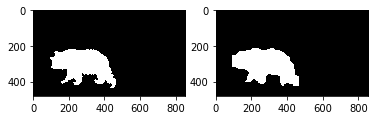

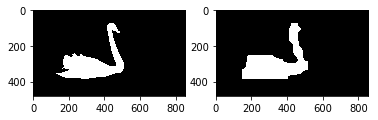

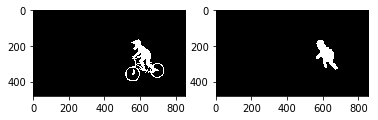

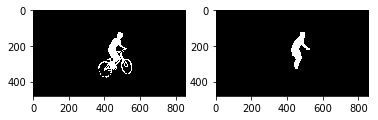

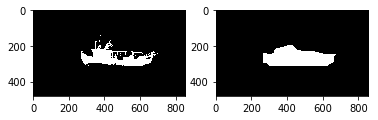

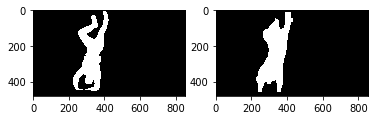

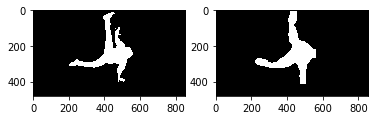

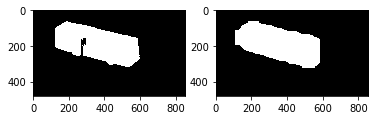

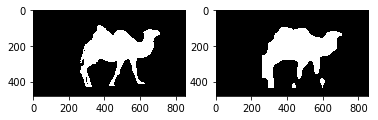

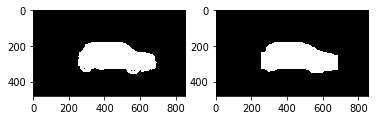

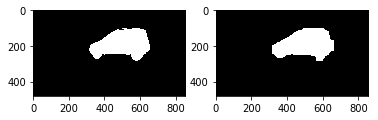

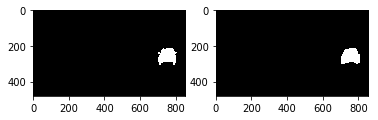

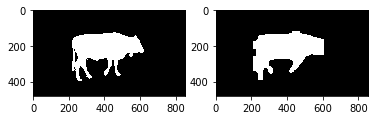

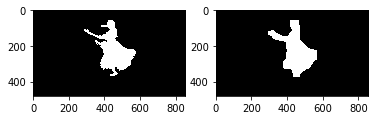

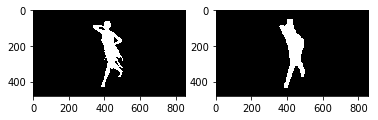

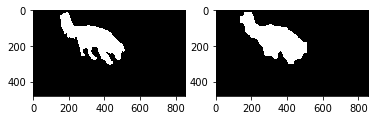

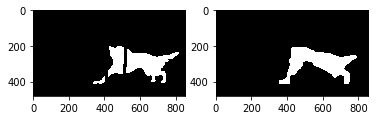

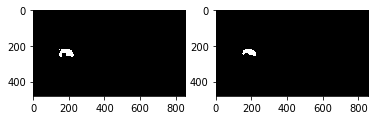

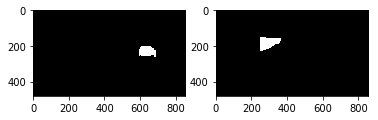

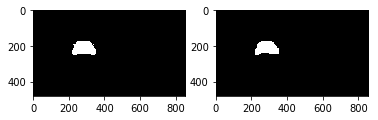

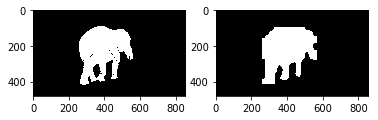

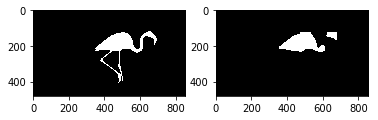

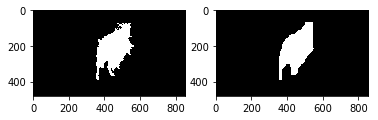

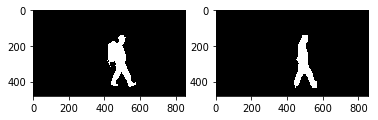

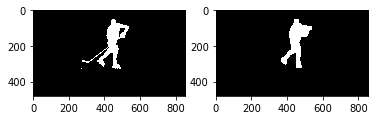

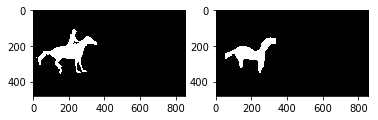

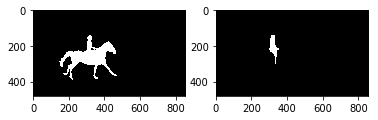

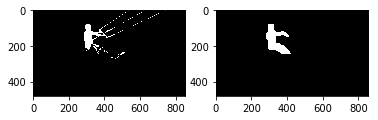

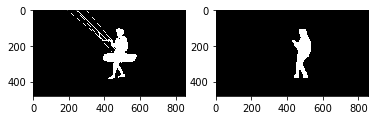

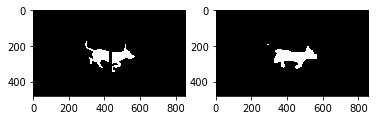

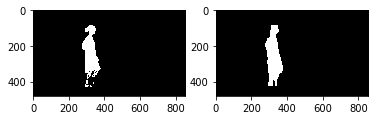

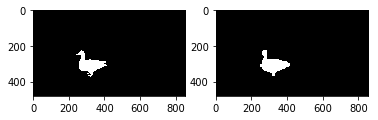

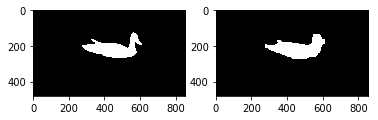

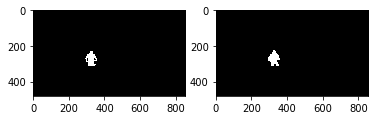

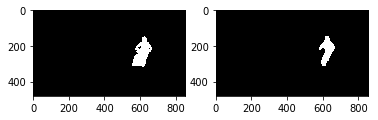

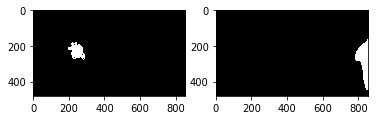

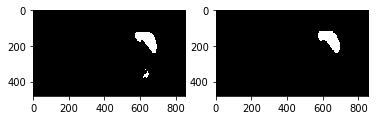

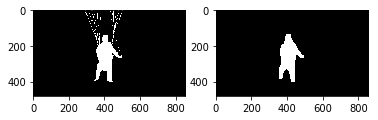

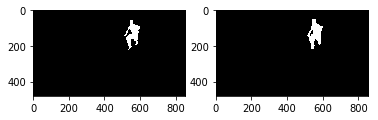

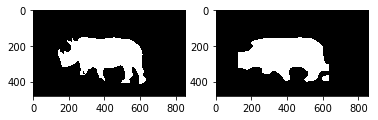

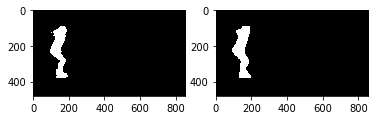

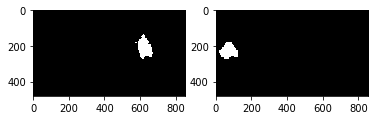

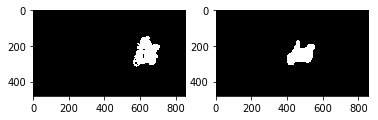

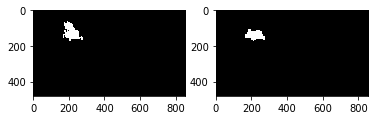

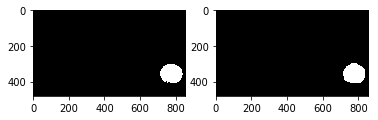

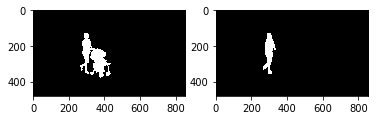

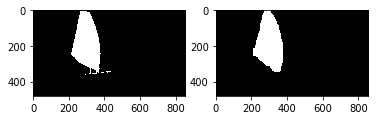

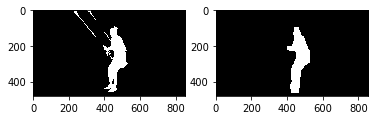

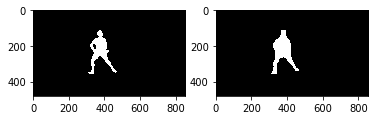

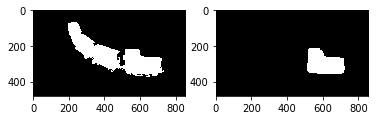

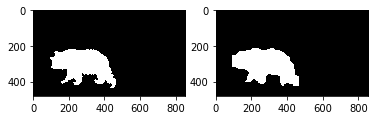

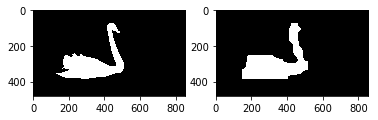

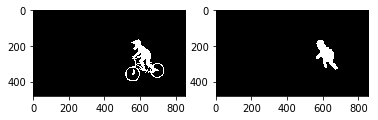

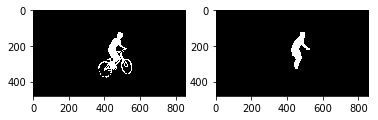

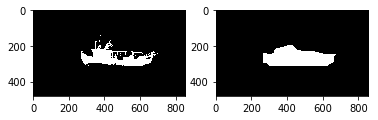

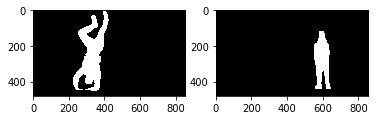

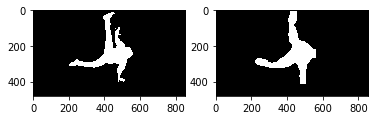

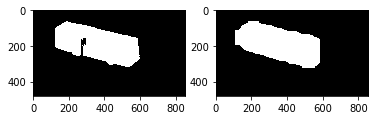

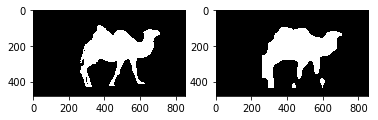

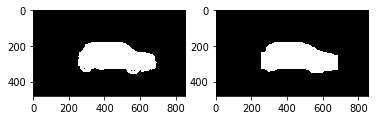

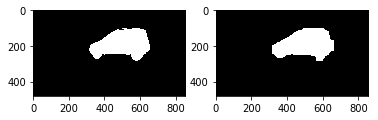

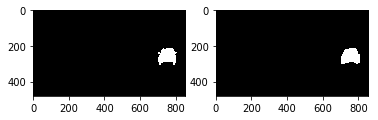

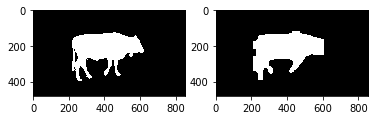

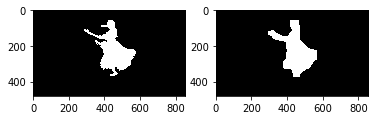

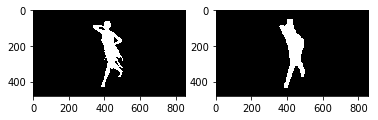

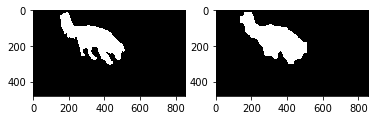

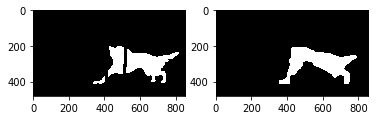

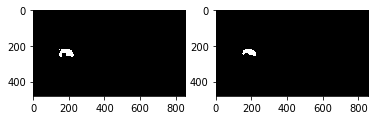

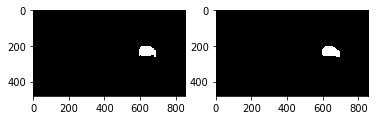

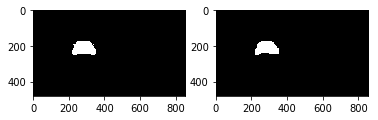

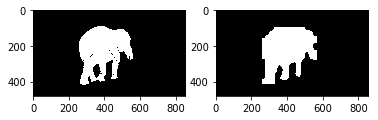

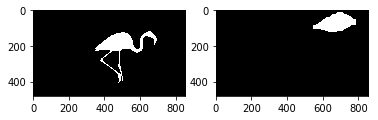

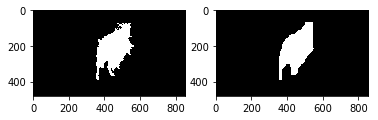

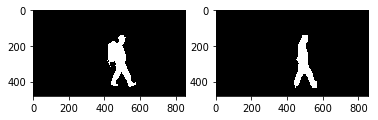

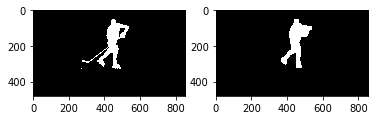

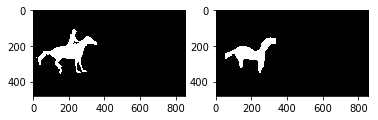

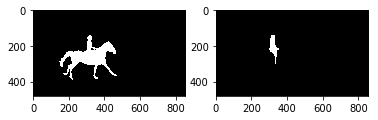

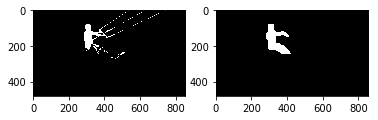

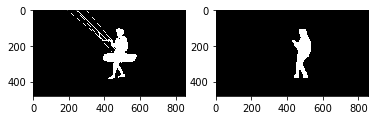

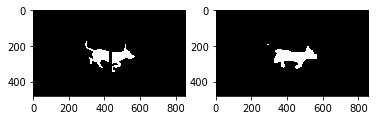

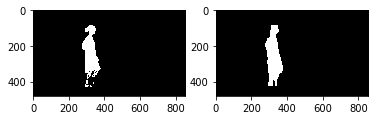

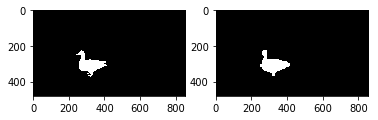

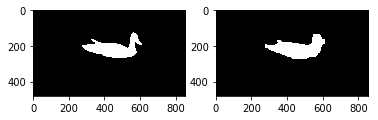

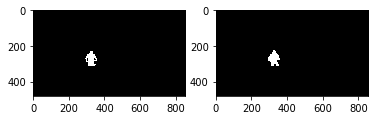

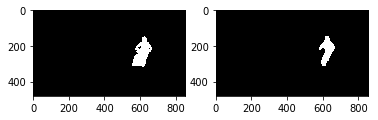

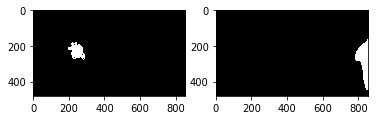

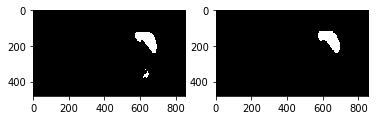

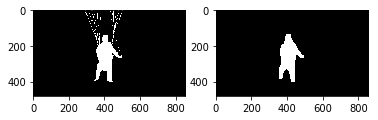

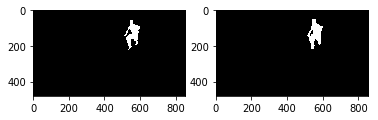

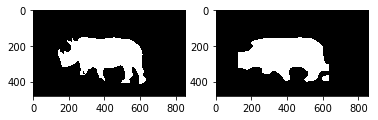

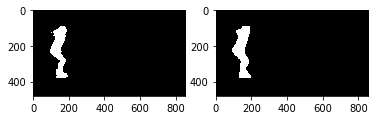

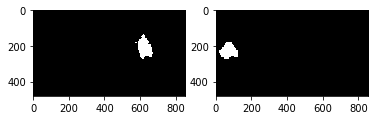

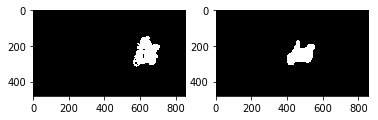

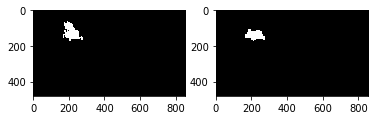

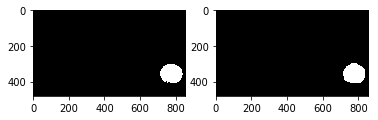

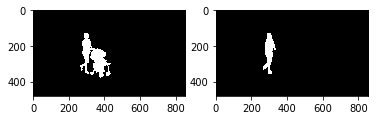

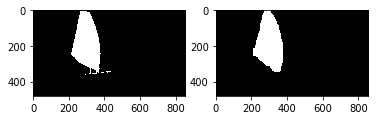

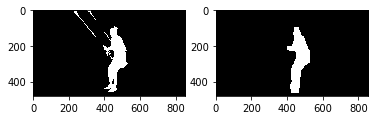

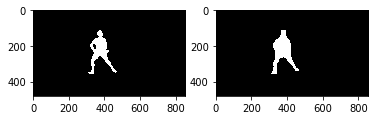

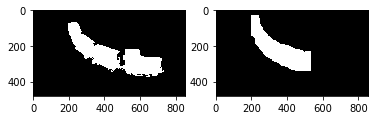

In [4]:
from IPython import embed
for d, a in product(davis, annot):
    
    img_path = os.path.join(IMAGE_DIR, 'DAVIS' + d,'JPEGImages/480p/') # davis_path
    gt_path = os.path.join(IMAGE_DIR, 'DAVIS' + d,'Annotations/480p/') # gt_path
    pred_path = os.path.join(PRED_DIR, 'DAVIS' + d + '_480p_masks', a) # pred_path
    
    for seq in sorted(os.listdir(pred_path)):
        # show mask
        fig = plt.figure()
        
        # READ ANNOTATIONS
        gt_img = os.path.join(gt_path, seq, '%05d.png' % frame)
        annot = np.array(Image.open(gt_img)) 
        
        plt.subplot(121)
        plt.imshow(annot*255, cmap ='gray')
        
        # READ PREDICTIONS
        pred_img = os.path.join(pred_path, seq, '%05d.png' % frame)
        pred = np.array(Image.open(pred_img))

        plt.subplot(122)
        plt.imshow(pred*255, cmap ='gray')            
            
        # PROPOSALS VS GT
        gt_mask = np.zeros(annot.shape)
        gt_mask[annot == 255] = 1
        iou_array = []

        iou = intersection_over_union(gt_mask, pred)

        print(" >> Annot: ", a, " >> Sequence: ", seq, " >> IOU: ", iou)
